In [1]:
# A Predictive Model

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import random

In [3]:
fullData = pd.read_csv('/path/bank-additional-full.csv',
                       sep = ";")

In [4]:
len(fullData)

41188

In [5]:
#Analyze the Data
fullData.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
fullData.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
fullData.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')

In [8]:
#The description is coming weird, Let's try to add ID column

In [9]:
fullData['ID'] = fullData.index

# We can also use 
# fullData['ID'] = range(1, len(fullData) + 1)

In [10]:
fullData.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y', u'ID'],
      dtype='object')

In [11]:
#Checking the data types of various columns
fullData.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
ID                  int64
dtype: object

In [12]:
fullData.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
ID                False
dtype: bool

In [13]:
ID_col = ['ID']
target_col = ['y']
other_col=['Type'] 

In [14]:
#Separate categorical and numerical data

In [15]:
num_cols = fullData._get_numeric_data().columns


In [16]:
cat_cols= list(set(list(fullData.columns))-set(num_cols)-set(ID_col)-set(target_col)-set(other_col))
# cat_cols2 = fullData.select_dtypes(include=['category','object']).dtypes

In [17]:
num_cols  = list(set(num_cols)-set(ID_col))

In [18]:
cat_cols

['education',
 'poutcome',
 'default',
 'loan',
 'day_of_week',
 'marital',
 'job',
 'contact',
 'month',
 'housing']

In [19]:
#Although the dataframe doesnt have any missing value but still showing for the purpose of usage
fullData[num_cols] = fullData[num_cols].fillna(fullData[num_cols].mean(),inplace=True)

/Users/prashantmudgal/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [20]:
#Impute categorical missing values with -9999
fullData[cat_cols] = fullData[cat_cols].fillna(value = -9999)

In [21]:
#Feature Scaling 
#Feature scaling is the method to limit the range of variables so that they can be compared on common grounds. 
#It is performed on continuous variables.

In [22]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [23]:
arr = fullData.dtypes[num_cols].index.values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115583890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a924550>]], dtype=object)

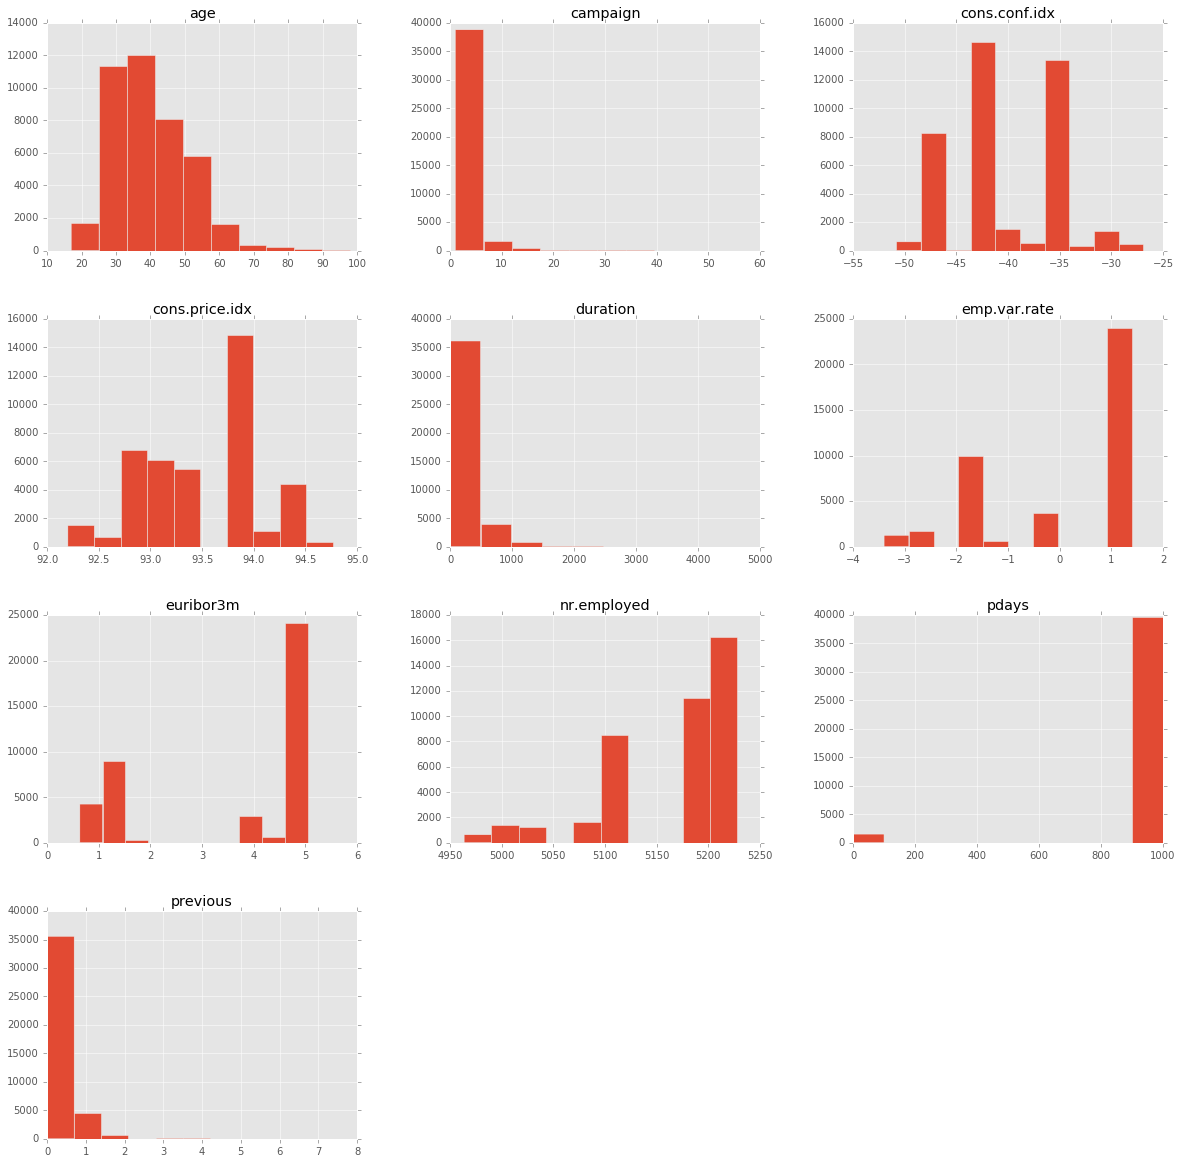

In [24]:
fullData[arr].hist(figsize=[20,20])

# You can also use the method below to plot individually
# df = fullData["campaign"]
# df.hist(figsize=[20,20])

In [25]:
#We can't build our models on categorical variables as they are String onjects, we need to convert them to some other 
#form, so we can use them in our models.
#Let's use LabelEncoder for the same purpose

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
for col in fullData.columns.values:
       if fullData[col].dtypes=='object':
        data=fullData[col].append(fullData[col])
        le.fit(data.values)
        fullData[col]=le.transform(fullData[col])

In [28]:
fullData.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,ID
0,56,3,1,0,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,7,1,3,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
2,37,7,1,3,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2
3,40,0,1,1,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,3
4,56,7,1,3,0,0,2,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,4


In [29]:
#This data is quite unscaled, let's for the sake of it try to fit KNN(K nearest Neighbor) model to the numerical
#variables
#If we try to apply distance based methods such as kNN on these features, feature with the largest range will dominate
#the outcome results and we’ll obtain less accurate predictions. We can overcome this trouble using feature scaling. 

In [30]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(fullData, test_size = 0.3, random_state = 42)
# Dropping the column y from the test dataframe
# test = test.drop('y', 1)

from sklearn.neighbors import KNeighborsClassifier
#x_train = train[list(num_cols)].values
x_train = train.values
y_train = train['y'].values
y_test = test['y'].values


In [31]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
x_test =  test.values
predictions = knn.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.91057700089018367

In [34]:
## Hmm...this is quite high accuracy, my assertion didn't come true :/ :(
## Let's try scaling once , Scaling is done on numerical variables


In [35]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [36]:
x_train_minmax = min_max.fit_transform(train[list(num_cols)])
x_test_minmax = min_max.fit_transform(test[list(num_cols)])

In [37]:
knn=KNeighborsClassifier(n_neighbors=5)

In [38]:
knn.fit(x_train_minmax,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
accuracy_score(y_test,knn.predict(x_test_minmax))

0.8863801893663511

In [40]:
l = list(y_train)
p = l.count(1)
x = len(y_train)

In [41]:
float(p)/x

0.11276057021955534

In [42]:
# Scaling didn't work in this case, but in general it does.
# Feature standardization - Normalization, I always use normalization while I am doing anything for operations research
# and optimization, it means variables have properties of a normal distribution i.e. zero mean and standard deviation 
# of 1


In [43]:
from sklearn.preprocessing import scale
x_train_scale = scale(train)
x_test_scale = scale(test)

In [44]:
#Let's build a logistic regression model on the scaled dataframes

In [45]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty ='l2', C = 1)

In [46]:
log.fit(x_train_scale,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
accuracy_score(y_test,log.predict(x_test_scale))

1.0

In [48]:
# Scaling improved the accuracy
# Let's see one more time how Logistic would behave with real data

In [49]:
log.fit(train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
accuracy_score(y_test,log.predict(test))

0.99959537104475193

In [51]:
# Let's use machine learning algos, random forest would be our choice

In [52]:
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
random.seed(100)
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
accuracy_score(y_test,rf.predict(x_test))
print(rf.predict(x_test).mean())

0.112405923768


In [54]:
#Let's use cross validation to improve

In [55]:
from sklearn import cross_validation
alg = RandomForestClassifier(random_state=1, n_estimators= 600, min_samples_split=8, min_samples_leaf=4)
scores = cross_validation.cross_val_score(alg,x_train,y_train,cv=10)
print(scores.mean())

1.0


In [56]:
alg.fit(x_train,y_train)
predictions = alg.predict(x_test)

In [57]:
predictions = predictions.astype(int)

In [58]:
print(predictions.mean())

0.112405923768


In [59]:
# Let's try to select the best features out of the input ones to build the model

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

In [61]:
selector = SelectKBest(f_classif, k=5)
selector.fit(x_train,y_train)

SelectKBest(k=5, score_func=<function f_classif at 0x11d868c80>)

In [62]:
# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

In [63]:
# You would need to understand the concept of p-values and hypothesis testing and significance level to use this
# method effectively.

In [64]:
features=list(set(list(fullData.columns)))


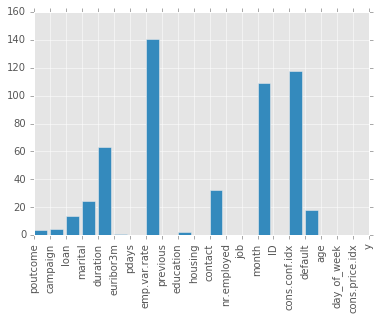

In [65]:
matplotlib.style.use('ggplot')
%matplotlib inline
plt.bar(range(len(features)), scores)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.show()

In [66]:
features_selectKBest = ['duration',
 'emp.var.rate',
 'contact',
 'month',
 'cons.conf.idx','age','marital','loan']

In [67]:
x_train_t_n = train[list(features_selectKBest)].values
y_train_t_n = train['y'].values
x_test_t_n = test[list(features_selectKBest)].values

In [68]:
alg_n = RandomForestClassifier(random_state=1, n_estimators= 600, min_samples_split= 8, min_samples_leaf=4)
scores = cross_validation.cross_val_score(alg,x_train_t_n,y_train_t_n,cv=10)

In [69]:
print(scores.mean())

0.907530417681


In [70]:
alg_n.fit(x_train_t_n,y_train_t_n)
predictions_n = alg_n.predict(x_test_t_n)

In [71]:
predictions_n = predictions_n.astype(int)
print(predictions_n.mean()) 

0.0895039249009


In [72]:
# End of Notebook